# Hearing test

In [106]:
!pip install xgboost

In [166]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, log_loss, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb
from sklearn.datasets import make_classification


In [170]:
df = pd.read_csv('hearing_test.csv')
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [153]:
df

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1
...,...,...,...
4995,73.0,3.9,0
4996,57.0,33.9,1
4997,49.0,34.5,1
4998,38.0,46.4,1


In [124]:
df.test_result.value_counts()

test_result
1    3000
0    2000
Name: count, dtype: int64

In [126]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


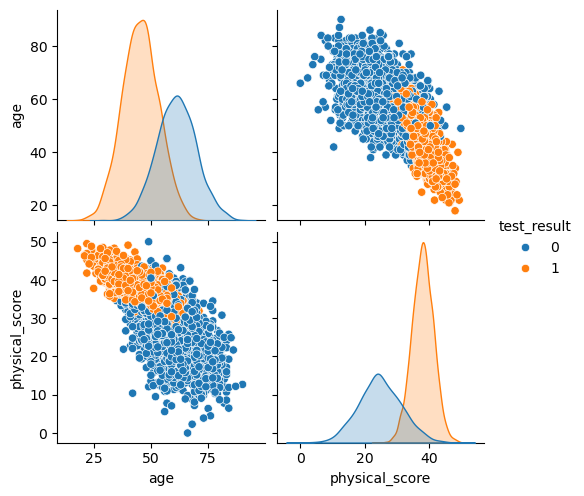

In [130]:
sns.pairplot(df, hue="test_result")

Признаки:
age - возраст участников, в годах
physical_score - оценка физического здоровья, полученная в результате физических тестов

Целевая переменная (Label/Target):
test_result - 0 если аудио-тест не пройден, 1 если аудио-тест пройден


In [133]:
X = df[['age', 'physical_score']]
y = df['test_result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(max_depth=4, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.9030
              precision    recall  f1-score   support

           0       0.87      0.88      0.87       384
           1       0.93      0.92      0.92       616

    accuracy                           0.90      1000
   macro avg       0.90      0.90      0.90      1000
weighted avg       0.90      0.90      0.90      1000



In [134]:
X = df[['age', 'physical_score']]
y = df['test_result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss')

param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}


grid_search = GridSearchCV(model, param_grid, cv=3, n_jobs=-1, verbose=1, scoring='accuracy')


grid_search.fit(X_train, y_train)


print("Best Parameters:", grid_search.best_params_)


y_pred = grid_search.best_estimator_.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.9}
Accuracy: 0.9190


In [172]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

X = df[['age', 'physical_score']]
y = df['test_result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Decision Tree": (DecisionTreeClassifier(), {
        'max_depth': [3, 5, 10],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }),
    "Random Forest": (RandomForestClassifier(), {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 10],
        'min_samples_split': [2, 5, 10]
    }),
    "AdaBoost": (AdaBoostClassifier(), {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1]
    }),
    "Gradient Boosting": (GradientBoostingClassifier(), {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 10]
    })
}

results = []

for name, (model, param_grid) in models.items():
    print(f"Training {name}...")
    grid_search = GridSearchCV(model, param_grid, cv=3, n_jobs=-1, verbose=1, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    results.append([name, accuracy, precision, recall, f1, grid_search.best_params_])
    
    print(f"{name} - Best Params: {grid_search.best_params_}")
    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")

results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-score", "Best Params"])
print(results_df)


Training Decision Tree...
Fitting 3 folds for each of 27 candidates, totalling 81 fits
Decision Tree - Best Params: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
Accuracy: 0.9130, Precision: 0.9026, Recall: 0.9627, F1-score: 0.9317

Training Random Forest...
Fitting 3 folds for each of 27 candidates, totalling 81 fits
Random Forest - Best Params: {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 50}
Accuracy: 0.9180, Precision: 0.9159, Recall: 0.9545, F1-score: 0.9348

Training AdaBoost...
Fitting 3 folds for each of 9 candidates, totalling 27 fits


C:\Users\akon_comp\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost - Best Params: {'learning_rate': 1, 'n_estimators': 50}
Accuracy: 0.8970, Precision: 0.9027, Recall: 0.9334, F1-score: 0.9178

Training Gradient Boosting...
Fitting 3 folds for each of 27 candidates, totalling 81 fits
Gradient Boosting - Best Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Accuracy: 0.9130, Precision: 0.9165, Recall: 0.9448, F1-score: 0.9305

               Model  Accuracy  Precision    Recall  F1-score  \
0      Decision Tree     0.913   0.902588  0.962662  0.931658   
1      Random Forest     0.918   0.915888  0.954545  0.934817   
2           AdaBoost     0.897   0.902669  0.933442  0.917797   
3  Gradient Boosting     0.913   0.916535  0.944805  0.930456   

                                         Best Params  
0  {'max_depth': 5, 'min_samples_leaf': 2, 'min_s...  
1  {'max_depth': 5, 'min_samples_split': 5, 'n_es...  
2           {'learning_rate': 1, 'n_estimators': 50}  
3  {'learning_rate': 0.1, 'max_depth': 3, 'n_esti...  


In [140]:
rf_model = RandomForestClassifier(n_estimators=5, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.9150
              precision    recall  f1-score   support

           0       0.94      0.84      0.88       384
           1       0.90      0.96      0.93       616

    accuracy                           0.92      1000
   macro avg       0.92      0.90      0.91      1000
weighted avg       0.92      0.92      0.91      1000



In [146]:
base_model = DecisionTreeClassifier(max_depth=5)

ada_model = AdaBoostClassifier(base_model, n_estimators=50, algorithm='SAMME', random_state=42)

ada_model.fit(X_train, y_train)

y_pred_ada = ada_model.predict(X_test)

print("AdaBoost Model:")
print("Accuracy:", accuracy_score(y_test, y_pred_ada))
print(classification_report(y_test, y_pred_ada))

AdaBoost Model:
Accuracy: 0.904
              precision    recall  f1-score   support

           0       0.90      0.84      0.87       384
           1       0.90      0.94      0.92       616

    accuracy                           0.90      1000
   macro avg       0.90      0.89      0.90      1000
weighted avg       0.90      0.90      0.90      1000



In [151]:
gb_model = GradientBoostingClassifier(n_estimators=50, random_state=42)
gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)

print("Gradient Boosting Model:")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))

Gradient Boosting Model:
Accuracy: 0.913
              precision    recall  f1-score   support

           0       0.91      0.86      0.88       384
           1       0.92      0.94      0.93       616

    accuracy                           0.91      1000
   macro avg       0.91      0.90      0.91      1000
weighted avg       0.91      0.91      0.91      1000

